# c

----



In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Optional: XGBoost (if installed)
try:
    from xgboost import XGBClassifier
    _xgb_available = True
except Exception:
    _xgb_available = False
    # You can install xgboost with: pip install xgboost


In [2]:
# Load dataset
df = pd.read_csv('bankloan.csv')
print('Dataset shape:', df.shape)
print('\nColumns:')
print(df.columns.tolist())
df.head()

Dataset shape: (5000, 14)

Columns:
['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Quick overview
display(df.describe(include='all').T)
print('\nMissing values per column:')
print(df.isnull().sum())

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0



Missing values per column:
ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


## Exploratory Data Analysis (EDA)

We'll examine distributions of numerical features, counts for categorical features, outliers (boxplots), and feature correlations.

Simple plots are created using matplotlib (each plot is separate).

Numeric columns: ['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']
Categorical columns: []


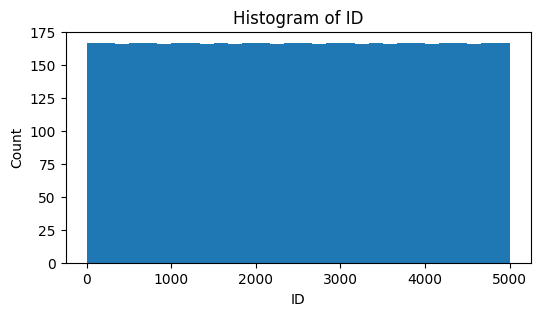

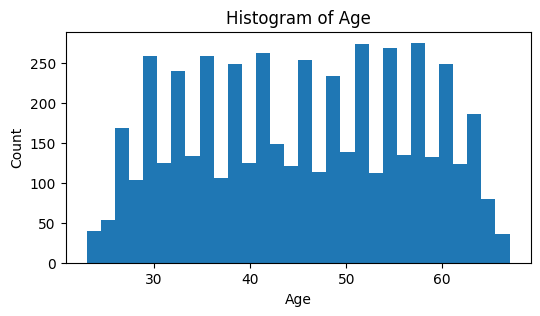

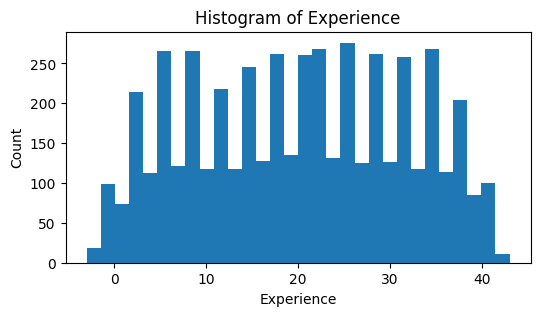

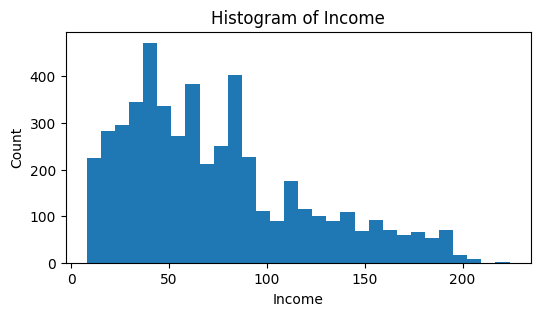

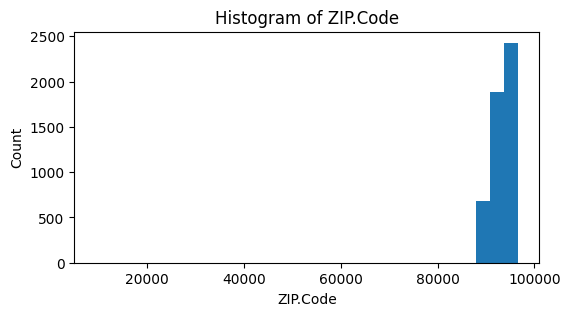

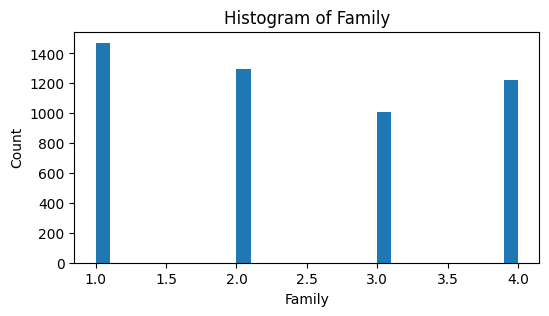

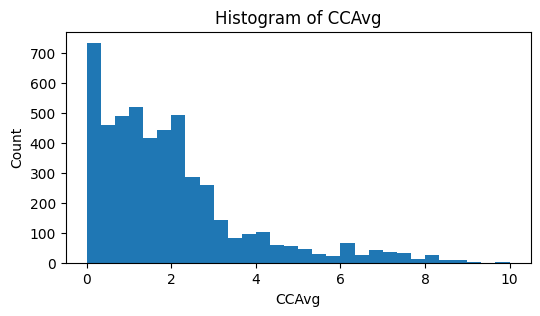

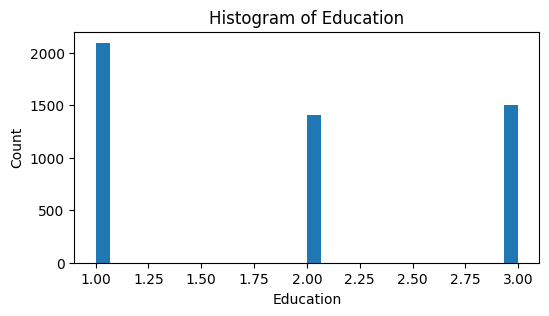

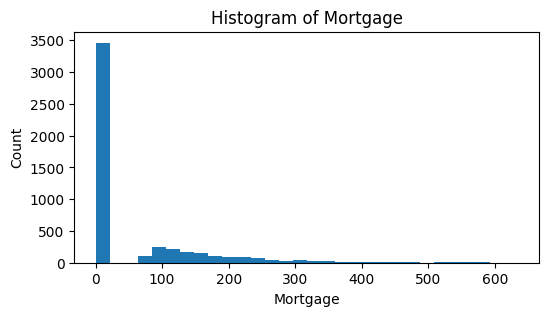

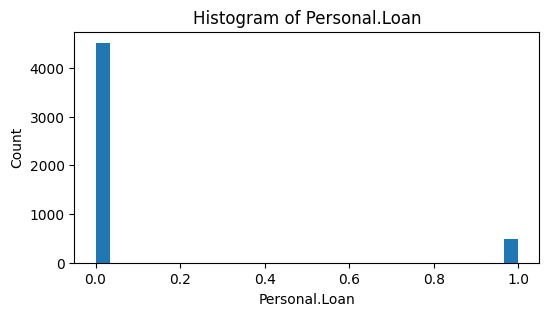

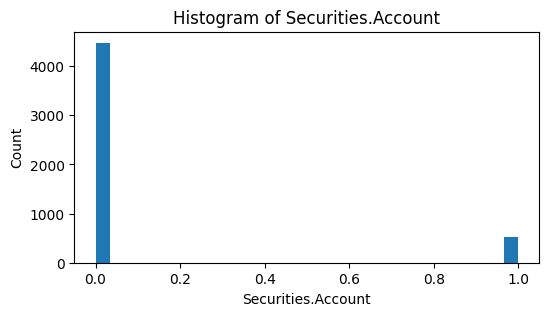

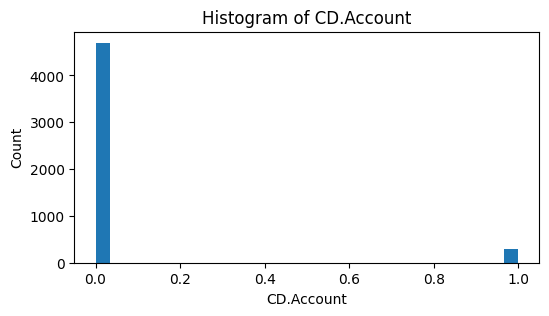

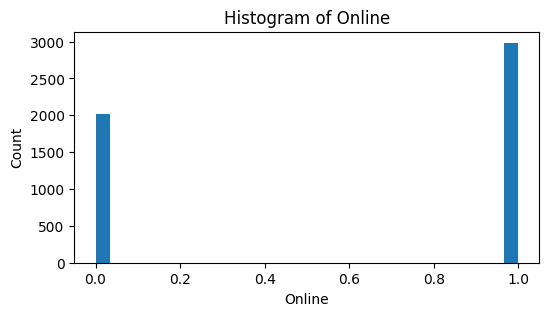

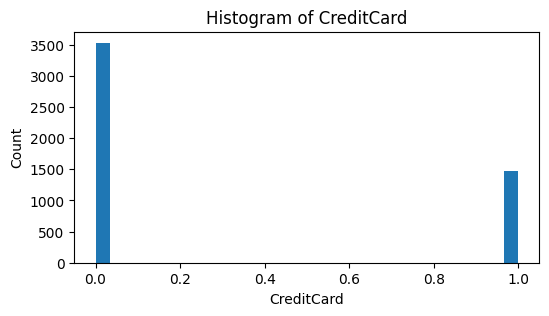

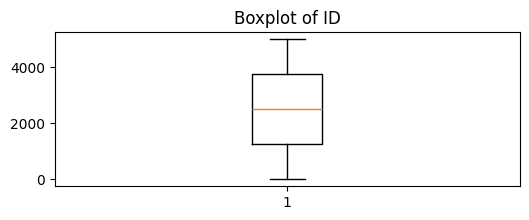

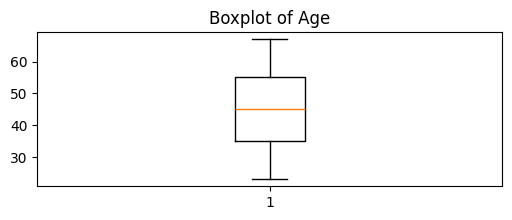

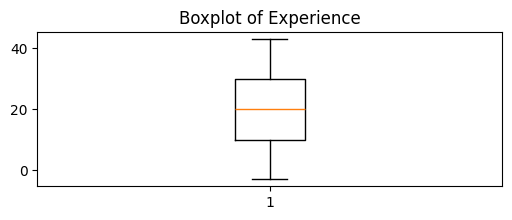

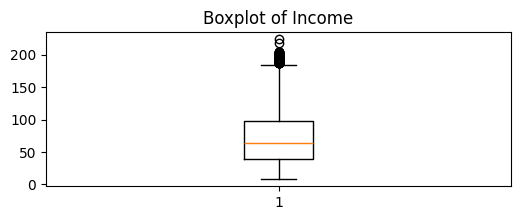

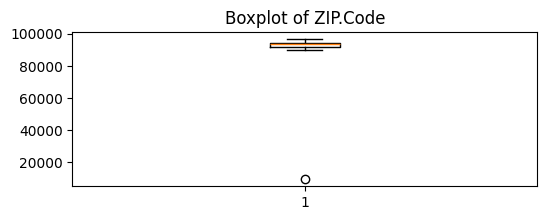

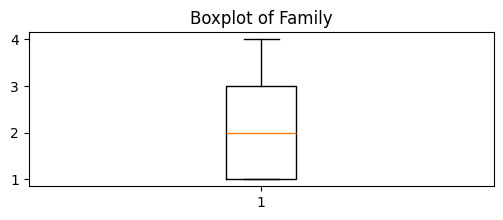

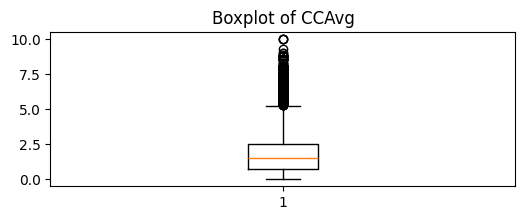

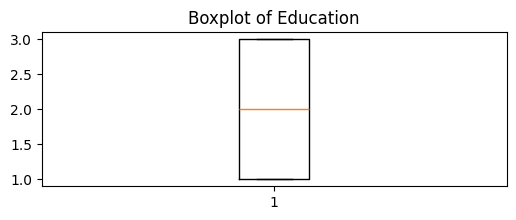

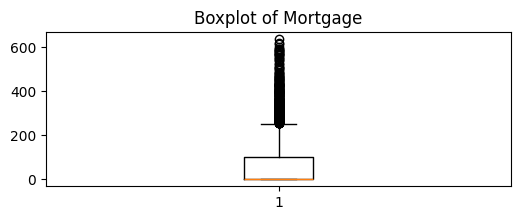

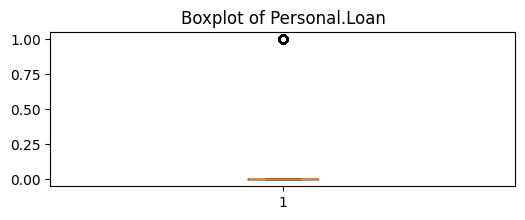

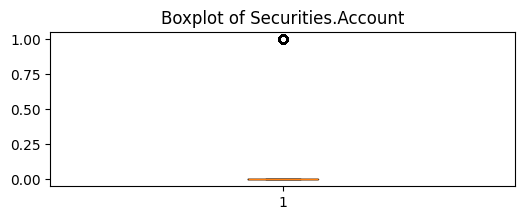

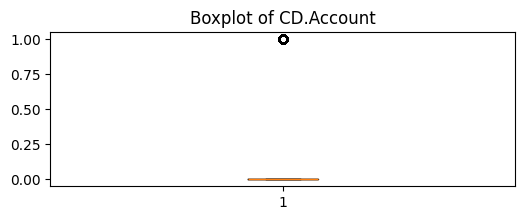

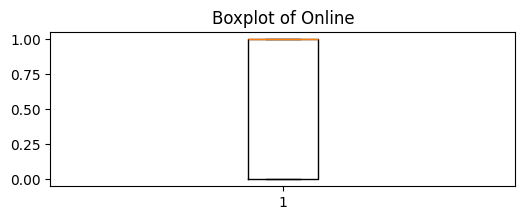

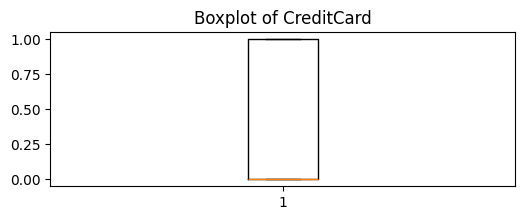

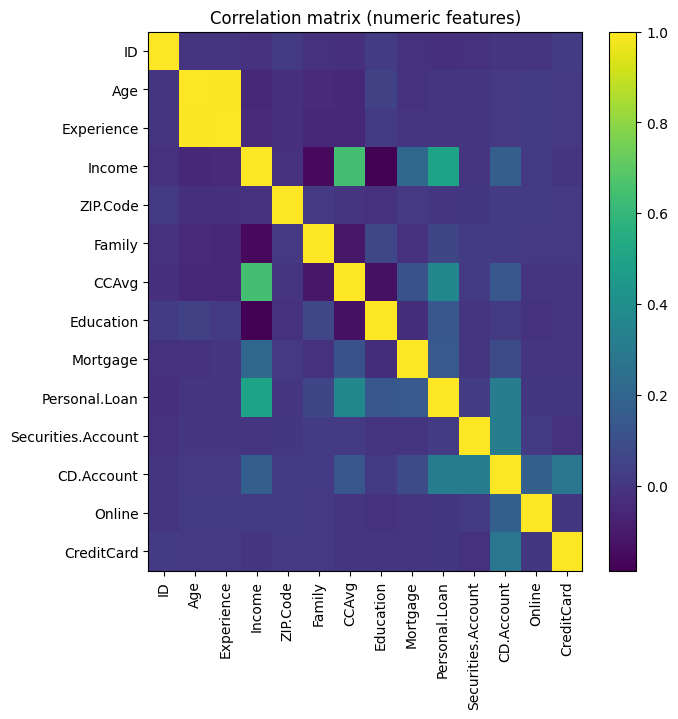

In [4]:
# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numeric columns:', num_cols)
print('Categorical columns:', cat_cols)

# Histograms for numeric features (one plot per feature)
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col); plt.ylabel('Count')
    plt.show()

# Value counts for categorical features
for col in cat_cols:
    plt.figure(figsize=(6,3))
    vc = df[col].fillna('MISSING').value_counts().head(20)
    vc.plot.bar()
    plt.title(f'Value counts for {col} (top values)')
    plt.xlabel(col); plt.ylabel('Count')
    plt.show()

# Boxplots for numeric features to inspect outliers
for col in num_cols:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation matrix for numeric columns
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(min(12, 0.5*len(num_cols)), min(10, 0.5*len(num_cols))))
    plt.imshow(corr, interpolation='nearest', aspect='auto')
    plt.colorbar()
    plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=90)
    plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
    plt.title('Correlation matrix (numeric features)')
    plt.show()
else:
    print('Not enough numeric columns for correlation matrix.')

## Preprocessing

Steps:

1. Fill missing values (numeric -> median, categorical -> constant 'MISSING').
2. Encode categorical variables (One-Hot for low-cardinality; Ordinal for high-cardinality).
3. Scale numeric features with StandardScaler.

We build a scikit-learn ColumnTransformer and Pipeline to keep everything reproducible.

In [5]:
# Assume the target column is named 'Loan_Status' or similar.
# If your dataset has a differently named target, change `target_col` below.
possible_targets = [c for c in df.columns if 'loan' in c.lower() or 'status' in c.lower() or 'approved' in c.lower()]
print('Columns that look like target candidates:', possible_targets)

# Heuristic: if there's exactly one of these candidates, use it. Otherwise ask user to rename.
if len(possible_targets) >= 1:
    target_col = possible_targets[0]
else:
    # fallback: use the last column as target
    target_col = df.columns[-1]
print('Using target column:', target_col)

# Convert target to numeric (binary 1/0) if necessary
y = df[target_col]
if y.dtype == 'object' or y.dtype.name == 'category':
    y = y.str.lower().map(lambda x: 1 if str(x).strip() in ['yes','y','approved','1','true','t'] else 0)
else:
    # If numeric but not binary, attempt to binarize (non-zero -> 1)
    unique_vals = pd.unique(y.dropna())
    if len(unique_vals) > 2:
        # Binarize by thresholding at median
        thr = y.median()
        y = (y > thr).astype(int)
    else:
        y = y.fillna(0).astype(int)

X = df.drop(columns=[target_col]).copy()

# Identify numeric and categorical features again
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category','bool']).columns.tolist()

# For categorical high-cardinality threshold, use 10 unique values
low_card_cats = [c for c in cat_features if X[c].nunique() <= 10]
high_card_cats = [c for c in cat_features if X[c].nunique() > 10]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

low_card_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

high_card_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('lowcat', low_card_cat_transformer, low_card_cats),
    ('highcat', high_card_cat_transformer, high_card_cats)
], remainder='drop')

print('Numeric features:', num_features)
print('Low-cardinality categorical features:', low_card_cats)
print('High-cardinality categorical features:', high_card_cats)

Columns that look like target candidates: ['Personal.Loan']
Using target column: Personal.Loan
Numeric features: ['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']
Low-cardinality categorical features: []
High-cardinality categorical features: []


In [6]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if len(pd.unique(y))>1 else None)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (4000, 13) Test shape: (1000, 13)


## Modeling

We'll create pipelines (preprocessor + estimator) for each model. For reproducibility we set random_state where applicable.

Models included:
- Linear Regression (baseline) — predictions thresholded at 0.5 to form binary labels.
- Logistic Regression (recommended linear classifier)
- Decision Tree
- Random Forest
- XGBoost (if library available)
- Neural Network (MLPClassifier from scikit-learn)

Each model will be trained on the training set and evaluated on the test set.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(pipeline, X_test, y_test, is_regressor=False):
    y_pred = pipeline.predict(X_test)
    # If regressor, threshold predictions
    if is_regressor:
        y_prob = pipeline.predict(X_test)
        y_pred_bin = (y_prob >= 0.5).astype(int)
        # For regressor we don't have probability estimates for roc in a reliable way; use predictions as 'score'
        try:
            auc = roc_auc_score(y_test, y_prob)
        except Exception:
            auc = float('nan')
        return {
            'accuracy': accuracy_score(y_test, y_pred_bin),
            'precision': precision_score(y_test, y_pred_bin, zero_division=0),
            'recall': recall_score(y_test, y_pred_bin, zero_division=0),
            'f1': f1_score(y_test, y_pred_bin, zero_division=0),
            'roc_auc': auc
        }
    else:
        # classifier
        try:
            y_prob = pipeline.predict_proba(X_test)[:,1]
        except Exception:
            # some classifiers don't implement predict_proba; use decision_function if available
            try:
                y_prob = pipeline.decision_function(X_test)
            except Exception:
                y_prob = None
        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else float('nan')
        return {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1': f1_score(y_test, y_pred, zero_division=0),
            'roc_auc': auc
        }

results = []

# 1) Linear Regression 
from sklearn.pipeline import Pipeline
linreg_pipeline = Pipeline(steps=[('preproc', preprocessor),
                                  ('model', LinearRegression())])
linreg_pipeline.fit(X_train, y_train)
res_lin = evaluate_model(linreg_pipeline, X_test, y_test, is_regressor=True)
res_lin['model'] = 'LinearRegression-baseline(thresholded)'
results.append(res_lin)

# 2) Logistic Regression
log_pipeline = Pipeline(steps=[('preproc', preprocessor),
                               ('model', LogisticRegression(max_iter=1000, random_state=42))])
log_pipeline.fit(X_train, y_train)
res_log = evaluate_model(log_pipeline, X_test, y_test, is_regressor=False)
res_log['model'] = 'LogisticRegression'
results.append(res_log)

# 3) Decision Tree
dt_pipeline = Pipeline(steps=[('preproc', preprocessor),
                              ('model', DecisionTreeClassifier(random_state=42))])
dt_pipeline.fit(X_train, y_train)
res_dt = evaluate_model(dt_pipeline, X_test, y_test)
res_dt['model'] = 'DecisionTree'
results.append(res_dt)

# 4) Random Forest
rf_pipeline = Pipeline(steps=[('preproc', preprocessor),
                              ('model', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)
res_rf = evaluate_model(rf_pipeline, X_test, y_test)
res_rf['model'] = 'RandomForest'
results.append(res_rf)



# 6) Neural Network (MLPClassifier)
mlp_pipeline = Pipeline(steps=[('preproc', preprocessor),
                               ('model', MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42))])
mlp_pipeline.fit(X_train, y_train)
res_mlp = evaluate_model(mlp_pipeline, X_test, y_test)
res_mlp['model'] = 'NeuralNetwork-MLP'
results.append(res_mlp)

# Create a results DataFrame
results_df = pd.DataFrame(results)[['model','accuracy','precision','recall','f1','roc_auc']]
results_df = results_df.sort_values(by='f1', ascending=False).reset_index(drop=True)
results_df

,model,accuracy,precision,recall,f1,roc_auc
0,RandomForest,0.990,0.967391,0.927083,0.946809,0.998370
1,DecisionTree,0.983,0.876190,0.958333,0.915423,0.971976
2,NeuralNetwork-MLP,0.980,0.887755,0.906250,0.896907,0.993490
3,LogisticRegression,0.951,0.805195,0.645833,0.716763,0.963092
4,LinearRegression-baseline(thresholded),0.932,0.911765,0.322917,0.476923,0.958195


,model,accuracy,precision,recall,f1,roc_auc
0,RandomForest,0.990,0.967391,0.927083,0.946809,0.998370
1,DecisionTree,0.983,0.876190,0.958333,0.915423,0.971976
2,NeuralNetwork-MLP,0.980,0.887755,0.906250,0.896907,0.993490
3,LogisticRegression,0.951,0.805195,0.645833,0.716763,0.963092
4,LinearRegression-baseline(thresholded),0.932,0.911765,0.322917,0.476923,0.958195


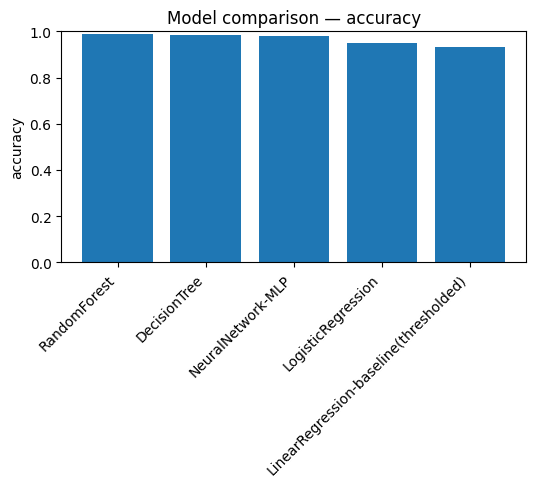

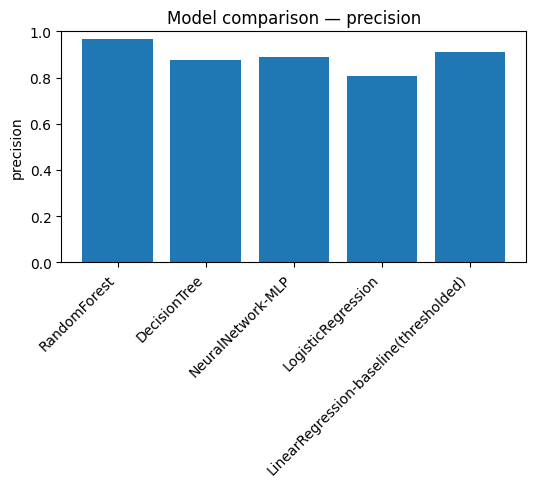

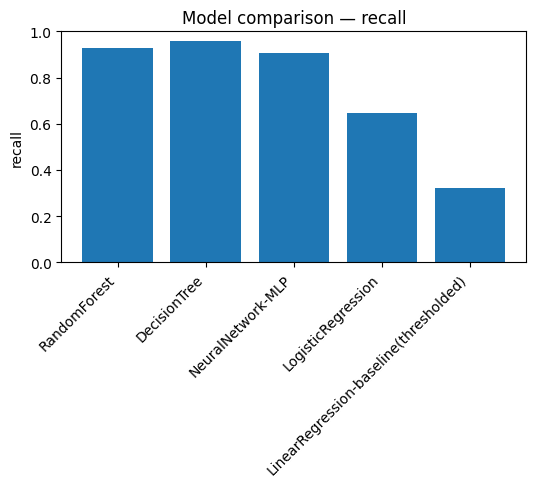

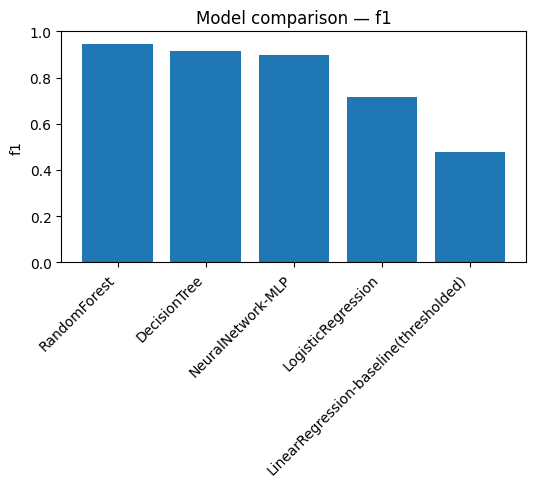

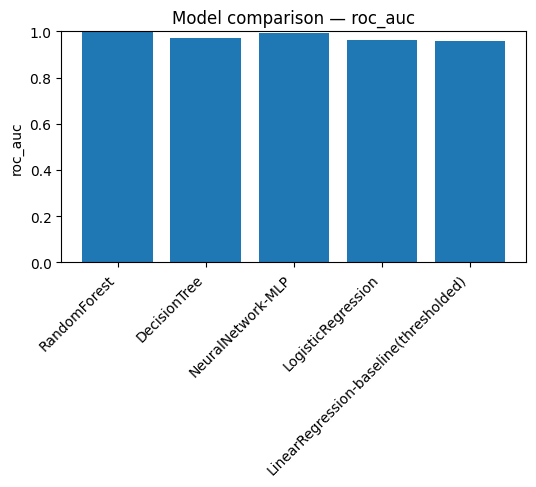

In [11]:
# Display results table and plot bar chart for comparison
display(results_df)

# Bar chart for key metrics per model (one metric at a time)
metrics = ['accuracy','precision','recall','f1','roc_auc']
for m in metrics:
    plt.figure(figsize=(6,3))
    plt.bar(results_df['model'], results_df[m])
    plt.title(f'Model comparison — {m}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(m)
    plt.ylim(0,1)
    plt.show()